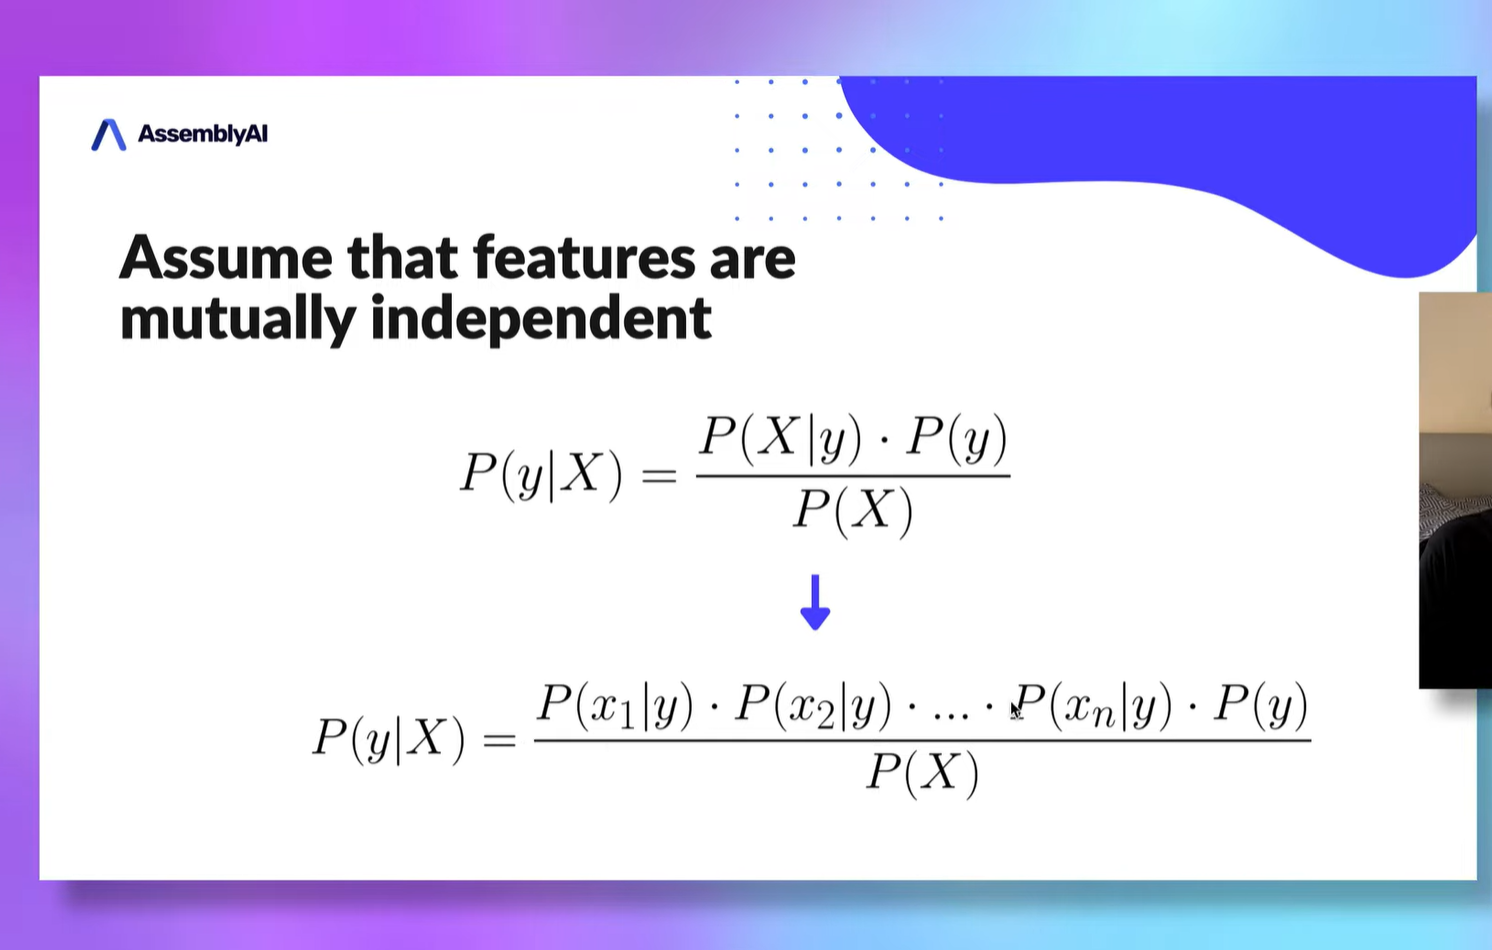

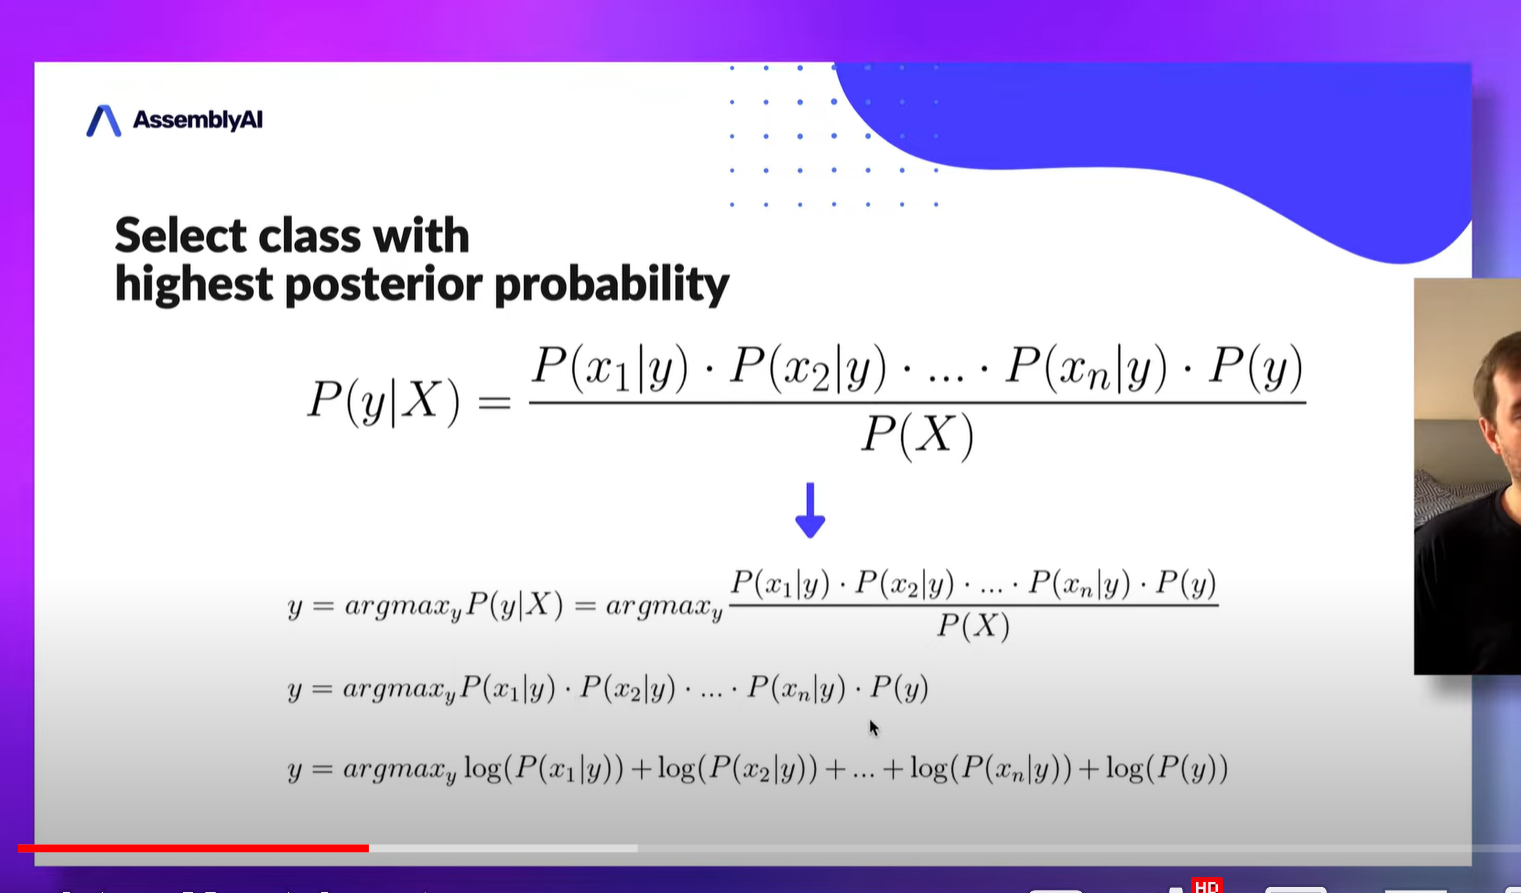

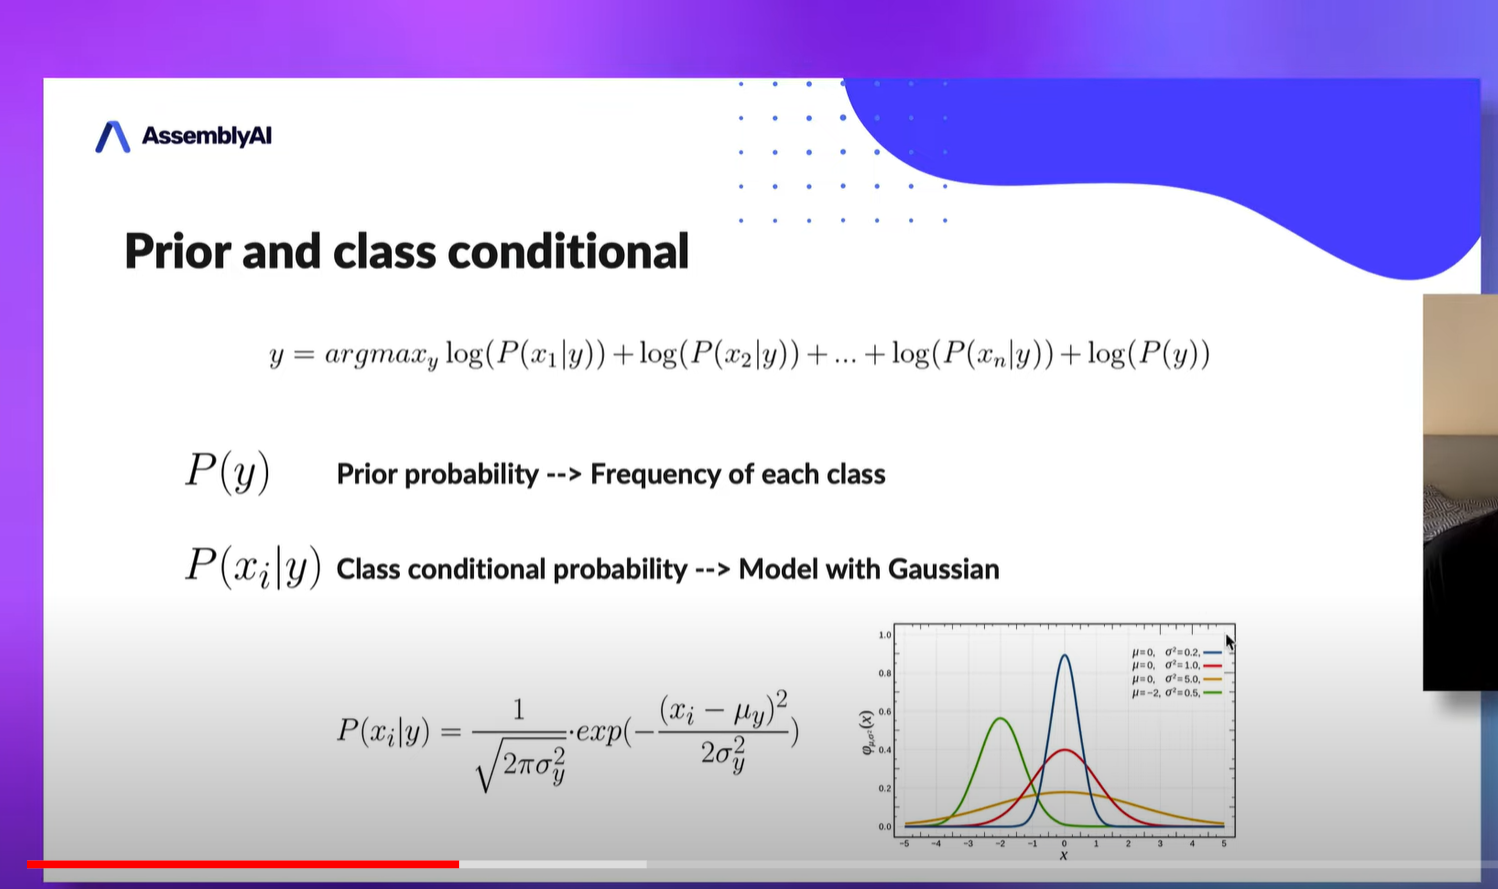

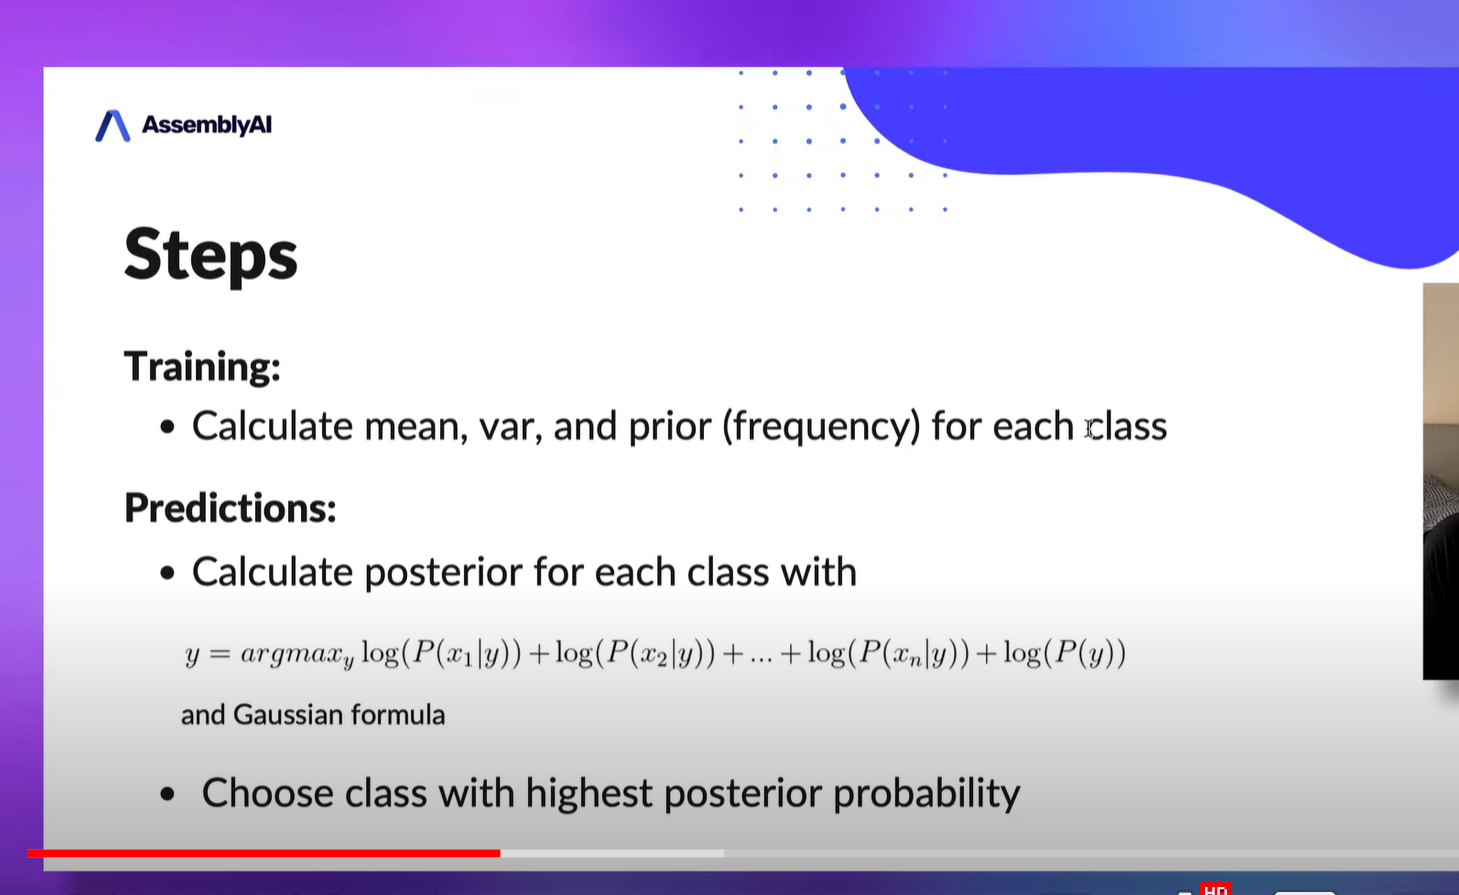

In [1]:
import numpy as np
import pandas as pd

In [8]:
class NaiveBayes:
    def fit(self,X,y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)
        
        #calculate the mean, var and prior for each class
        self._mean = np.zeros((n_classes,n_features),dtype=np.float64)
        self._var = np.zeros((n_classes,n_features),dtype=np.float64)
        self._priors = np.zeros(n_classes,dtype=np.float64)
        
        for idx,c in enumerate(self._classes):
            X_c = X[y==c]
            self._mean[idx,:] = X_c.mean(axis=0)
            self._var[idx,:] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)
            
        
    
    def predict(self,X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)
    
    def _predict(self,x):
        posteriors = []
        
        #calculate posterior probability for each class
        for idx,c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx,x)))
            
            posterior += prior
            
            posteriors.append(posterior)
        
        #return the class with the highest posterior
        return self._classes[np.argmax(posteriors)]
    
    def _pdf(self,class_idx,x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        #check the formula in the images above
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2*np.pi*var)
        
        return numerator/denominator
        

In [3]:
import sklearn
from sklearn import datasets

bc = datasets.load_breast_cancer()

X,y = bc.data,bc.target

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [9]:
clf = NaiveBayes()
clf.fit(X_train,y_train)
preds = clf.predict(X_test)

C:\Users\saif\AppData\Local\Temp\ipykernel_29036\1680476680.py:30: RuntimeWarning: divide by zero encountered in log
  posterior = np.sum(np.log(self._pdf(idx,x)))


In [10]:
acc = np.sum(preds == y_test) /len(y_test) 
acc

0.9090909090909091